# Example 8

In [1]:
import gemgis as gg

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import geopandas as gpd
import rasterio 

In [3]:
topo = gpd.read_file('topo8.shp')
topo.head()

,id,Z,geometry
0,None,800,"LINESTRING (8.360 333.390, 94.504 303.527, 184..."
1,None,700,"LINESTRING (2954.497 1855.274, 2918.891 1755.3..."
2,None,900,"LINESTRING (3.765 3486.274, 124.368 3510.394, ..."
3,None,800,"LINESTRING (3.191 3280.676, 105.416 3314.559, ..."
4,None,700,"LINESTRING (3.191 2934.376, 53.729 2986.062, 1..."


In [4]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=10)


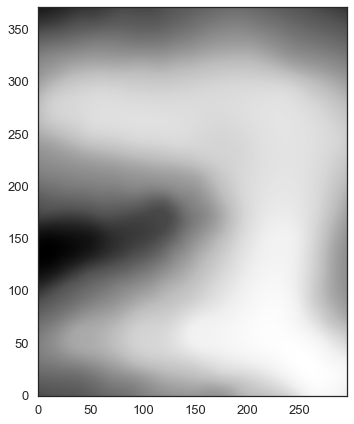

In [5]:
import matplotlib.pyplot as plt
plt.imshow(topo_raster, origin='lower')

In [6]:
topo_raster = rasterio.open('raster8.tif')

In [7]:
interfaces = gpd.read_file('interfaces8.shp')
interfaces.head()

,id,formation,geometry
0,None,C,"LINESTRING (1714.018 3708.526, 1663.480 3610.8..."
1,None,B,"LINESTRING (1352.212 3709.675, 1318.903 3630.4..."
2,None,C,"LINESTRING (2089.608 876.100, 2059.744 795.698..."
3,None,B,"LINESTRING (1757.665 920.895, 1725.504 829.007..."
4,None,F1,"LINESTRING (8.360 1153.485, 131.259 1129.364, ..."


In [8]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=topo_raster)
interfaces_coords = interfaces_coords.sort_values(by='formation', ascending=False)
interfaces_coords = interfaces_coords[interfaces_coords['formation'].isin(['F1', 'C', 'B'])] 
interfaces_coords.head()

,formation,geometry,X,Y,Z
113,F1,POINT (2953.348 1017.951),2953.35,1017.95,745.77
101,F1,POINT (1681.858 944.441),1681.86,944.44,567.06
90,F1,POINT (8.360 1153.485),8.36,1153.48,1003.28
91,F1,POINT (131.259 1129.364),131.26,1129.36,968.30
92,F1,POINT (265.644 1098.352),265.64,1098.35,909.05


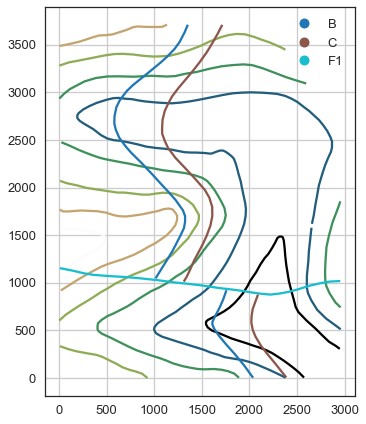

In [9]:
fig, ax = plt.subplots(1)

topo.plot(ax=ax, column='Z', cmap='gist_earth', aspect='equal')
interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')

plt.grid()

In [10]:
strikes = gpd.read_file('strikes8.shp')
strikes.head()

,id,formation,Z,geometry
0,1,B1,500,"LINESTRING (1645.103 652.699, 1651.420 479.261)"
1,1,C1,500,"LINESTRING (2151.632 301.230, 2144.740 877.823)"
2,1,C,600,"LINESTRING (1148.337 2886.709, 1154.654 2403.152)"
3,2,C,700,"LINESTRING (1390.115 3204.869, 1390.690 2132.659)"
4,1,B,600,"LINESTRING (654.443 2938.970, 658.463 2486.999)"


In [11]:
orientations_f1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='F1'].sort_values(by='Z', ascending=True).reset_index())
orientations_f1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,64.17,180.06,550.00,POINT (2142.443 936.831),1.00,F1,2142.44,936.83
1,65.03,180.15,650.00,POINT (2034.906 985.072),1.00,F1,2034.91,985.07
2,65.86,180.16,750.00,POINT (1907.556 1031.877),1.00,F1,1907.56,1031.88
3,70.31,180.05,850.00,POINT (1732.539 1074.232),1.00,F1,1732.54,1074.23
4,66.70,180.12,950.00,POINT (1559.676 1118.740),1.00,F1,1559.68,1118.74


In [12]:
orientations_c = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='C'].sort_values(by='Z', ascending=True).reset_index())
orientations_c

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,22.97,269.85,650.00,POINT (1270.949 2656.847),1.00,C,1270.95,2656.85


In [13]:
orientations_c1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='C1'].sort_values(by='Z', ascending=True).reset_index())
orientations_c1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,23.26,269.27,550.00,POINT (2265.629 516.591),1.00,C1,2265.63,516.59


In [14]:
orientations_b = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='B'].sort_values(by='Z', ascending=True).reset_index())
orientations_b

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,22.35,269.26,650.00,POINT (778.778 2702.073),1.00,B,778.78,2702.07
1,22.74,269.74,750.00,POINT (1023.571 2506.812),1.00,B,1023.57,2506.81


In [15]:
orientations_b1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='B1'].sort_values(by='Z', ascending=True).reset_index())
orientations_b1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,22.32,269.37,550.00,POINT (1771.304 559.376),1.00,B1,1771.30,559.38


In [16]:
import pandas as pd
orientations = pd.concat([orientations_f1, orientations_c, orientations_c1, orientations_b, orientations_b1]).reset_index()
orientations['formation'] = ['F1', 'F1', 'F1', 'F1', 'F1', 'C', 'C', 'B', 'B', 'B']
orientations = orientations[orientations['formation'].isin(['F1', 'C', 'B'])]
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,64.17,180.06,550.00,POINT (2142.443 936.831),1.00,F1,2142.44,936.83
1,1,65.03,180.15,650.00,POINT (2034.906 985.072),1.00,F1,2034.91,985.07
2,2,65.86,180.16,750.00,POINT (1907.556 1031.877),1.00,F1,1907.56,1031.88
3,3,70.31,180.05,850.00,POINT (1732.539 1074.232),1.00,F1,1732.54,1074.23
4,4,66.70,180.12,950.00,POINT (1559.676 1118.740),1.00,F1,1559.68,1118.74
5,0,22.97,269.85,650.00,POINT (1270.949 2656.847),1.00,C,1270.95,2656.85
6,0,23.26,269.27,550.00,POINT (2265.629 516.591),1.00,C,2265.63,516.59
7,0,22.35,269.26,650.00,POINT (778.778 2702.073),1.00,B,778.78,2702.07
8,1,22.74,269.74,750.00,POINT (1023.571 2506.812),1.00,B,1023.57,2506.81
9,0,22.32,269.37,550.00,POINT (1771.304 559.376),1.00,B,1771.30,559.38


In [17]:
import numpy as np 
orientations['dip'] = np.abs(orientations['dip'].values)
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,64.17,180.06,550.00,POINT (2142.443 936.831),1.00,F1,2142.44,936.83
1,1,65.03,180.15,650.00,POINT (2034.906 985.072),1.00,F1,2034.91,985.07
2,2,65.86,180.16,750.00,POINT (1907.556 1031.877),1.00,F1,1907.56,1031.88
3,3,70.31,180.05,850.00,POINT (1732.539 1074.232),1.00,F1,1732.54,1074.23
4,4,66.70,180.12,950.00,POINT (1559.676 1118.740),1.00,F1,1559.68,1118.74
5,0,22.97,269.85,650.00,POINT (1270.949 2656.847),1.00,C,1270.95,2656.85
6,0,23.26,269.27,550.00,POINT (2265.629 516.591),1.00,C,2265.63,516.59
7,0,22.35,269.26,650.00,POINT (778.778 2702.073),1.00,B,778.78,2702.07
8,1,22.74,269.74,750.00,POINT (1023.571 2506.812),1.00,B,1023.57,2506.81
9,0,22.32,269.37,550.00,POINT (1771.304 559.376),1.00,B,1771.30,559.38


In [18]:
import gempy as gp

In [19]:
geo_model = gp.create_model('Model8')
geo_model

Model8  2021-03-25 09:00

In [20]:
gp.init_data(geo_model, [0,2957,0,3715,0,1250], [50,50,75],
             surface_points_df = interfaces_coords[interfaces_coords['Z']!=0],
             orientations_df = orientations,
             default_values=True)

Active grids: ['regular']


Model8  2021-03-25 09:00

In [21]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,F1,Default series,1,#015482,1
1,C,Default series,2,#9f0052,2
2,B,Default series,3,#ffbe00,3


In [22]:
gp.map_stack_to_surfaces(geo_model,
                         {
                            
                          'Fault1': ('F1'),   
                      'Strata1': ('C', 'B'),
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('A')
geo_model.set_is_fault(['Fault1'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,True,True,False
Strata1,2,Erosion,True,False,False


In [23]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
0,F1,Fault1,1,#527682,1,24,5
1,C,Strata1,1,#9f0052,2,43,2
2,B,Strata1,2,#ffbe00,3,47,3
3,A,Strata1,3,#728f02,4,0,0


In [24]:
geo_model.set_topography(
    source='gdal', filepath='raster8.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  29.57      ,   37.15      ,    8.33333333],
       [  29.57      ,   37.15      ,   25.        ],
       [  29.57      ,   37.15      ,   41.66666667],
       ...,
       [2952.00506757, 3690.03360215,  931.20074463],
       [2952.00506757, 3700.02016129,  933.94940186],
       [2952.00506757, 3710.00672043,  936.69573975]])

In [25]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                    values
range             4909.95
$C_o$           573989.86
drift equations    [3, 3]


In [26]:
sol = gp.compute_model(geo_model, compute_mesh=True)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\core\solution.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.geological_map = np.array([values[0][:, l0: l1], values[4][:, l0: l1].astype(float)])


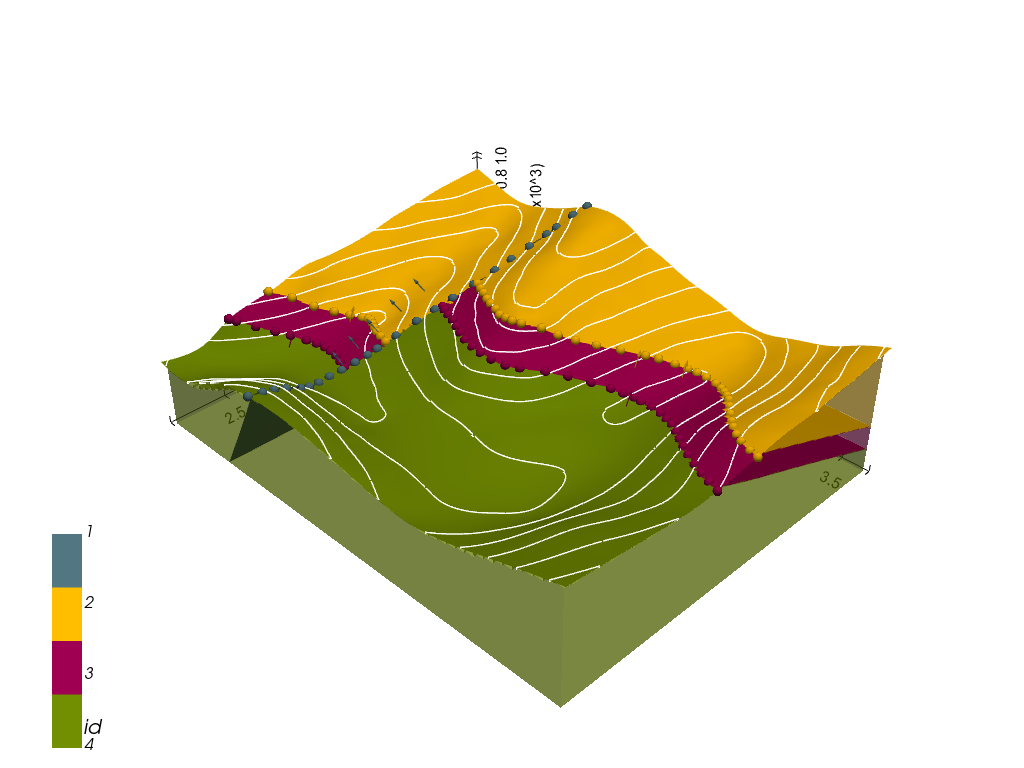

In [29]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)